## 数据探索

观察数据的各种特征，包括数据的分布、缺失值、异常值等等。以及分布情况

In [33]:
# import seaborn and pandas
import seaborn as sns
import pandas as pd


# read data from 'train.csv'
data = pd.read_csv('train.csv')

data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


我们有keyword、location、text、target四个特征，其中keyword和location是缺失值，target是我们的目标值，text是我们的文本数据。

发现，keyword和location数据缺失严重。text数据没有缺失，也没有重复的数据。

In [34]:
# 分析 数据中 keyword、location、text 的缺失值
# 使用 seaborn 和matplotlib 绘制饼状图，查看两者缺失值的比例
import matplotlib.pyplot as plt

data["keyword"].count()
data.count()

id          7613
keyword     7552
location    5080
text        7613
target      7613
dtype: int64

0.9919873899908052
0.6672796532247471


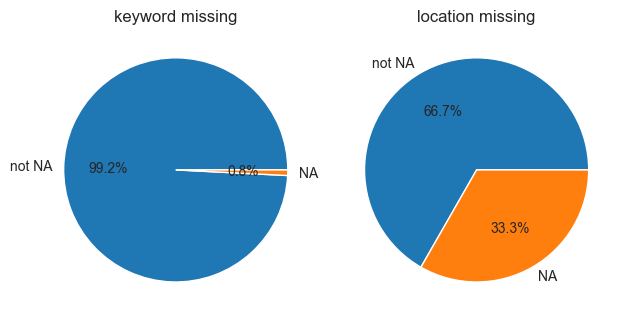

In [38]:

# 绘制 keyword 缺失比例的饼状图

# set theme
sns.set_style("darkgrid")


keywords_na = data["keyword"].count() / data["id"].count()
location_na = data["location"].count() / data["id"].count()
print(keywords_na)
print(location_na)
# ddata two pie charts into one figure

plt.subplot(1, 2, 1)

plt.pie([keywords_na,1-keywords_na], labels=["not NA","NA"], autopct='%1.1f%%')
plt.title("keyword missing")

# 绘制 location 缺失比例的饼状图
plt.subplot(1, 2, 2)
plt.pie([location_na,1-location_na], labels=['not NA','NA'], autopct='%1.1f%%')
plt.title("location missing")

plt.tight_layout()

# set colors
plt.show()




<Axes: title={'center': 'Distribution of target'}, xlabel='target', ylabel='count'>

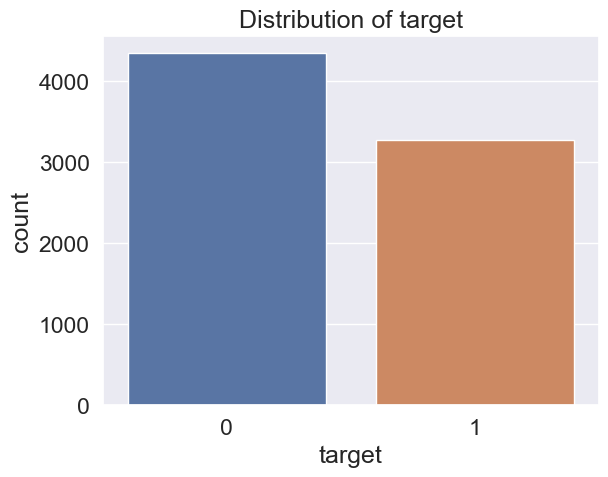

In [27]:
# 探索 target 的分布

# 使用 seaborn 绘制 target 的分布图，taget 为 0 的表示不是真实的灾难信息，为 1 的表示是真实的灾难信息

# 绘制 target 的分布图
plt.title("Distribution of target")
sns.countplot(x="target",data=data)


keyword
derailment           39
wreckage             39
outbreak             39
debris               37
oil%20spill          37
typhoon              37
evacuated            32
suicide%20bombing    32
rescuers             32
suicide%20bomb       32
Name: count, dtype: int64


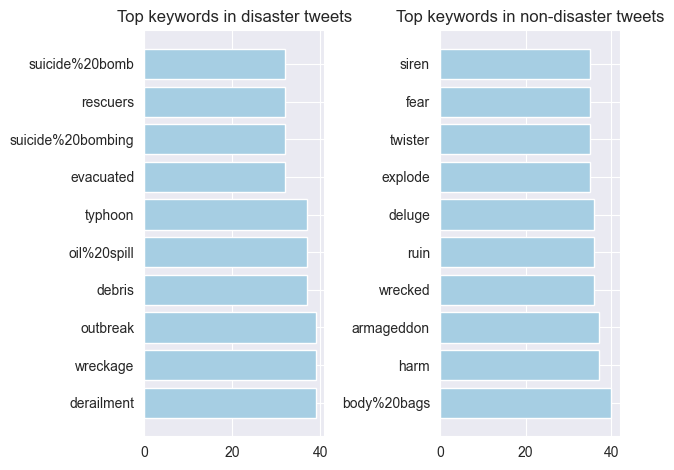

In [55]:
kw_d = data[data.target==1].keyword.value_counts().head(10)
kw_nd = data[data.target==0].keyword.value_counts().head(10)

print(kw_d)

# make it colorful
sns.set_palette(sns.color_palette("Paired"))

# draw two barh plots into one figure
plt.subplot(1, 2, 1)
plt.barh(y=kw_d.index, width=kw_d)
plt.title("Top keywords in disaster tweets")

plt.subplot(1, 2, 2)
plt.barh(y=kw_nd.index, width=kw_nd)
plt.title("Top keywords in non-disaster tweets")

plt.tight_layout()


plt.show()

关键词处理：加载text后面

文本关键词分析 # todo

location
USA               67
United States     27
Nigeria           22
India             20
Mumbai            19
UK                16
London            16
New York          16
Washington, DC    15
Canada            13
Name: count, dtype: int64


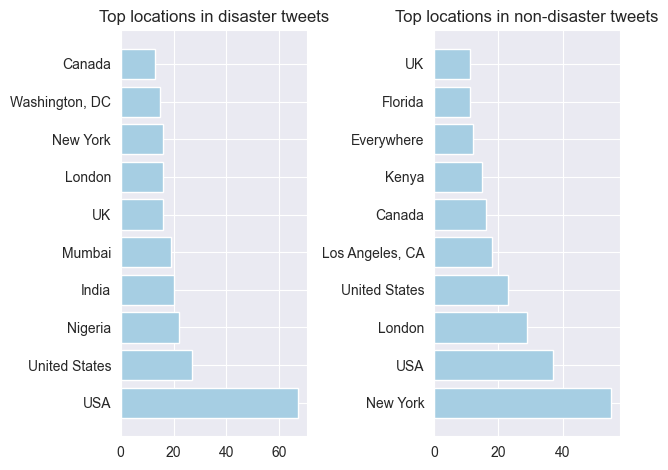

In [56]:
kw_d = data[data.target==1].location.value_counts().head(10)
kw_nd = data[data.target==0].location.value_counts().head(10)

print(kw_d)

# make it colorful
sns.set_palette(sns.color_palette("Paired"))

# draw two barh plots into one figure
plt.subplot(1, 2, 1)
plt.barh(y=kw_d.index, width=kw_d)
plt.title("Top locations in disaster tweets")

plt.subplot(1, 2, 2)
plt.barh(y=kw_nd.index, width=kw_nd)
plt.title("Top locations in non-disaster tweets")

plt.tight_layout()


plt.show()